<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E6.1 Logistic Regression**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data/advertising.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 1) Create a DataFrame object from advertising.csv
df = pd.read_csv(path)

In [7]:
print(df.head())

   Daily Time Spent on Site  Age    Income  Daily Internet Usage  \
0                     68.95   35  61833.90                256.09   
1                     80.23   31  68441.85                193.77   
2                     69.47   26  59785.94                236.50   
3                     74.15   29  54806.18                245.89   
4                     68.37   35  73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Clicked on Ad  
0   3/27/2016 0:53              0  
1    4/4/2016 1:39              0  
2  3/13/2016 2

In [8]:
print(df.tail())

     Daily Time Spent on Site  Age    Income  Daily Internet Usage  \
995                     72.97   30  71384.57                208.58   
996                     51.30   45  67782.17                134.42   
997                     51.63   51  42415.72                120.37   
998                     55.55   19  41920.79                187.95   
999                     45.01   26  29875.80                178.35   

                            Ad Topic Line           City  Male  \
995         Fundamental modular algorithm      Duffystad     1   
996       Grass-roots cohesive monitoring    New Darlene     1   
997          Expanded intangible solution  South Jessica     1   
998  Proactive bandwidth-monitored policy    West Steven     0   
999       Virtual 5thgeneration emulation    Ronniemouth     0   

                    Country        Timestamp  Clicked on Ad  
995                 Lebanon  2/11/2016 21:49              1  
996  Bosnia and Herzegovina   4/22/2016 2:07              

In [11]:
# 2) Perform logistic regression setup
X = df[["Daily Time Spent on Site"]]
y = df["Clicked on Ad"]


# Split training and testing data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# 3) Make predictions on the testing data
y_pred = model.predict(X_test)

In [14]:
# 4) Compute probability distribution using the model’s coefficients and intercept
# Sigmoid function: p = 1 / (1 + exp(-(b0 + b1*x)))
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# Create a range of values for visualization
x_vals = np.linspace(X["Daily Time Spent on Site"].min(), X["Daily Time Spent on Site"].max(), 200)
probabilities = 1 / (1 + np.exp(-(b0 + b1 * x_vals)))

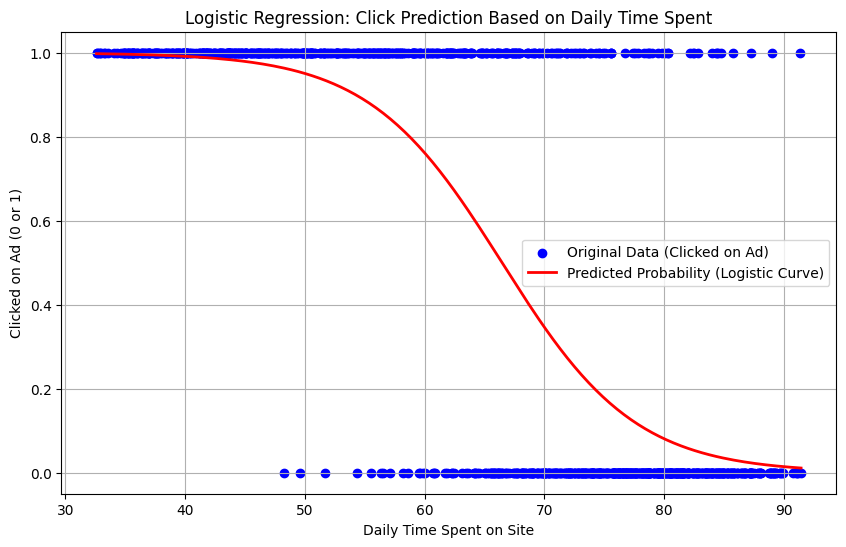

In [15]:
# 5) Visualize the data points, predicted values, and probability distribution
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Original Data (Clicked on Ad)")
plt.plot(x_vals, probabilities, color="red", linewidth=2, label="Predicted Probability (Logistic Curve)")
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Clicked on Ad (0 or 1)")
plt.title("Logistic Regression: Click Prediction Based on Daily Time Spent")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Display model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.87
Confusion Matrix:
 [[81  8]
 [18 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        89
           1       0.92      0.84      0.88       111

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



**E6.2 Multiple Logistic Regression**

In [17]:
# 1) Use the same DataFrame and perform logistic regression with multiple predictors
X_multi = df[["Daily Time Spent on Site", "Income", "Age"]]
y_multi = df["Clicked on Ad"]

# Split the data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train the logistic regression model
model_multi = LogisticRegression(max_iter=1000)
model_multi.fit(X_train_m, y_train_m)

LogisticRegression(max_iter=1000)

In [18]:
# 2) Make predictions on the testing data
y_pred_m = model_multi.predict(X_test_m)

In [19]:
# 3) Compute probability distribution
# Sigmoid function for multivariable case: p = 1 / (1 + exp(-(b0 + b1*x1 + b2*x2 + b3*x3)))
b0_m = model_multi.intercept_[0]
b_m = model_multi.coef_[0]
probabilities_m = model_multi.predict_proba(X_test_m)[:, 1]

In [20]:
# Display results
print("Intercept:", b0_m)
print("Coefficients:", b_m)
print("Accuracy:", accuracy_score(y_test_m, y_pred_m))
print("Confusion Matrix:\n", confusion_matrix(y_test_m, y_pred_m))
print("Classification Report:\n", classification_report(y_test_m, y_pred_m))

Intercept: 15.552065174903033
Coefficients: [-2.02587795e-01 -1.28272555e-04  1.59204160e-01]
Accuracy: 0.905
Confusion Matrix:
 [[84  5]
 [14 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        89
           1       0.95      0.87      0.91       111

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



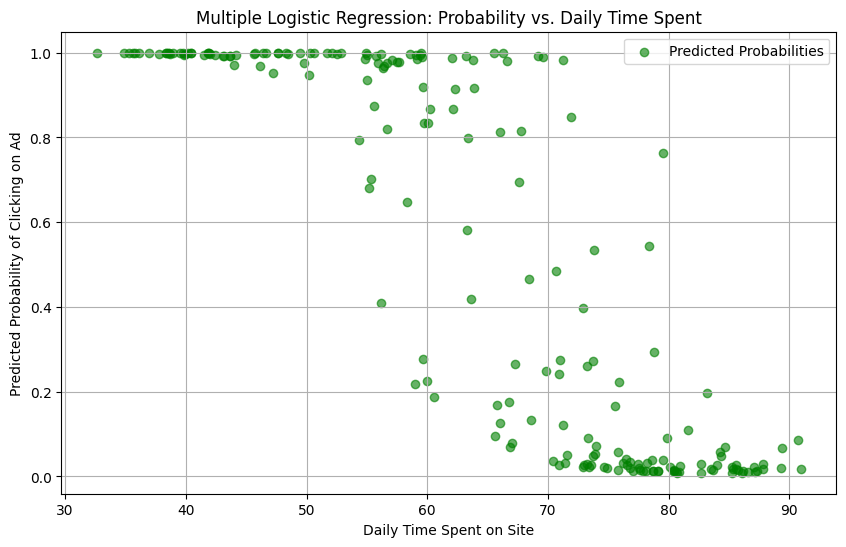

In [21]:
# Optional visualization for one variable vs. probability (using Daily Time Spent on Site)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_m["Daily Time Spent on Site"], probabilities_m, color="green", alpha=0.6, label="Predicted Probabilities")
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Predicted Probability of Clicking on Ad")
plt.title("Multiple Logistic Regression: Probability vs. Daily Time Spent")
plt.legend()
plt.grid(True)
plt.show()

**What the graph tell us**

- It visually confirms the relationship between "Daily Time Spent" and ad-click likelihood.

- It shows that the model produces probabilities between 0 and 1, not just binary 0/1 predictions.

- It helps identify if the logistic model behaves as expected (monotonic increase or decrease).

- Outliers or unexpected points (e.g., users with high site time but low predicted probability) can highlight interesting behavior or noise in the data.